In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [2]:
clientes = pd.read_csv("https://github.com/edunb01/dotfiles/raw/master/olist_customers_dataset.csv")
items = pd.read_csv("https://github.com/edunb01/dotfiles/raw/master/olist_order_items_dataset.csv")
pagamentos = pd.read_csv("https://github.com/edunb01/dotfiles/raw/master/olist_order_payments_dataset.csv")
avals = pd.read_csv("https://github.com/edunb01/dotfiles/raw/master/olist_order_reviews_dataset.csv")
entregas = pd.read_csv("https://github.com/edunb01/dotfiles/raw/master/olist_orders_dataset.csv")
produtos = pd.read_csv("https://github.com/edunb01/dotfiles/raw/master/olist_products_dataset.csv")
vendedored = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_sellers_dataset.csv")

In [3]:
merged = pd.merge(entregas,clientes,on="customer_id",how="outer")
merged = pd.merge(pagamentos,merged,on="order_id",how="outer")
merged = pd.merge(avals,merged,on="order_id",how="outer")
merged2 = pd.merge(items,produtos,on="product_id",how="outer")
merged2 = pd.merge(vendedored,merged2,on="seller_id",how="outer")
merged = pd.merge(merged2,merged,on="order_id",how="outer")


In [4]:
merged.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,4a90af3e85dd563884e2afeab1091394,1.0,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,...,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,f421a2a66b69dbfe6db0c87845281a90,4661,sao paulo,SP
1,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1.0,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,...,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,b4527423469300ee354458e1b5f961be,32223,contagem,MG
2,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2.0,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,...,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,af0f26435fade1ca984d9affda307199,9310,maua,SP
3,8c16d1f32a54d92897cc437244442e1b,89023.0,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1.0,1b37d55343061aa2b18b807945ff9831,2017-09-05 12:50:19,118.90,26.68,...,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,af0f26435fade1ca984d9affda307199,9310,maua,SP
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844.0,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1.0,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,...,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04 00:00:00,be1401bbfd64455c798bb4683e915c61,22050,rio de janeiro,RJ


In [5]:
merged.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,4a90af3e85dd563884e2afeab1091394,1.0,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,...,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,f421a2a66b69dbfe6db0c87845281a90,4661,sao paulo,SP
1,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1.0,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,...,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,b4527423469300ee354458e1b5f961be,32223,contagem,MG
2,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2.0,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,...,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,af0f26435fade1ca984d9affda307199,9310,maua,SP
3,8c16d1f32a54d92897cc437244442e1b,89023.0,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1.0,1b37d55343061aa2b18b807945ff9831,2017-09-05 12:50:19,118.90,26.68,...,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,af0f26435fade1ca984d9affda307199,9310,maua,SP
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844.0,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1.0,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,...,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04 00:00:00,be1401bbfd64455c798bb4683e915c61,22050,rio de janeiro,RJ


In [6]:
merged.iloc[5,:]

seller_id                        d1b65fc7debc3361ea86b5f14c68d2e2
seller_zip_code_prefix                                    13844.0
seller_city                                            mogi guacu
seller_state                                                   SP
order_id                         06e4e324b83309e575442446e34377d7
order_item_id                                                 1.0
product_id                       1c36a5285f7f3b1ed2637d7c528ce5ff
shipping_limit_date                           2017-06-30 02:25:24
price                                                        99.9
freight_value                                                22.7
product_category_name                            malas_acessorios
product_name_lenght                                          21.0
product_description_lenght                                  769.0
product_photos_qty                                            4.0
product_weight_g                                           1600.0
product_le

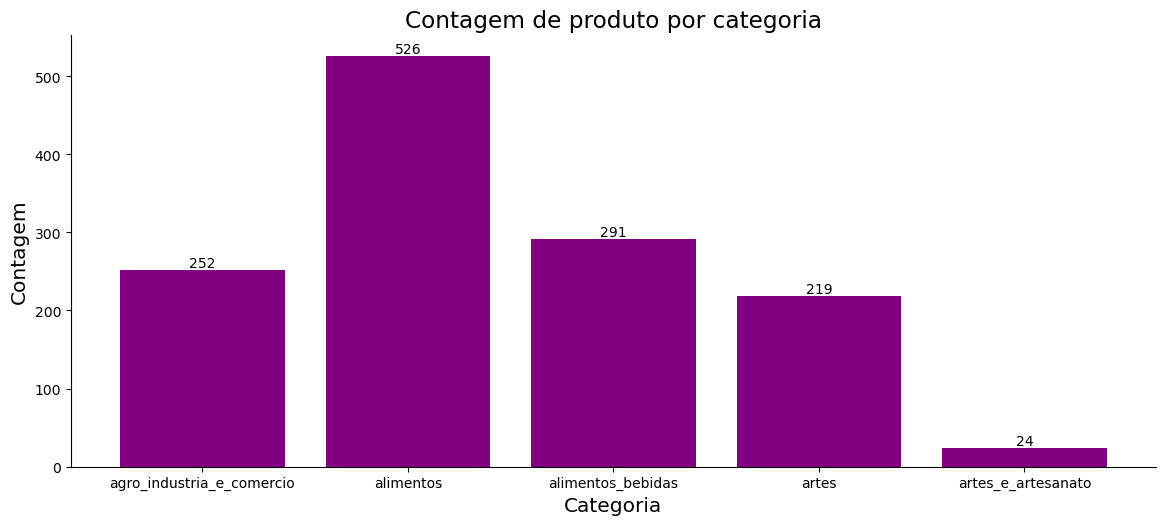

In [60]:
categorias = merged["product_category_name"].value_counts().sort_index(ascending=True)[:5]

lista_anos = list(categorias.index)
object_list = [str(i) for i in lista_anos]
object_list
colors = ["purple"]
fig, px = plt.subplots(figsize=(14,5.6))
_=plt.title("Contagem de produto por categoria", fontsize=16.7)
_=plt.ylabel("Contagem",fontsize=14.5)
_=plt.xlabel("Categoria",fontsize=14.5)
px.bar(object_list,categorias.values,color=colors)
_=plt.gca().spines["top"].set_visible(False)
_=plt.gca().spines["right"].set_visible(False)
#gca mean:  "get current axes"
for i,v in enumerate(categorias.values):
    px.text(i,v,str(v), ha="center",va="bottom")


plt.show()

In [8]:
estados = merged.groupby("customer_state")["product_category_name"].count().sort_values(ascending=False)[:10]

In [9]:
estados

customer_state
SP    49145
RJ    15188
MG    13534
RS     6437
PR     5908
SC     4254
BA     3994
DF     2467
GO     2397
ES     2332
Name: product_category_name, dtype: int64

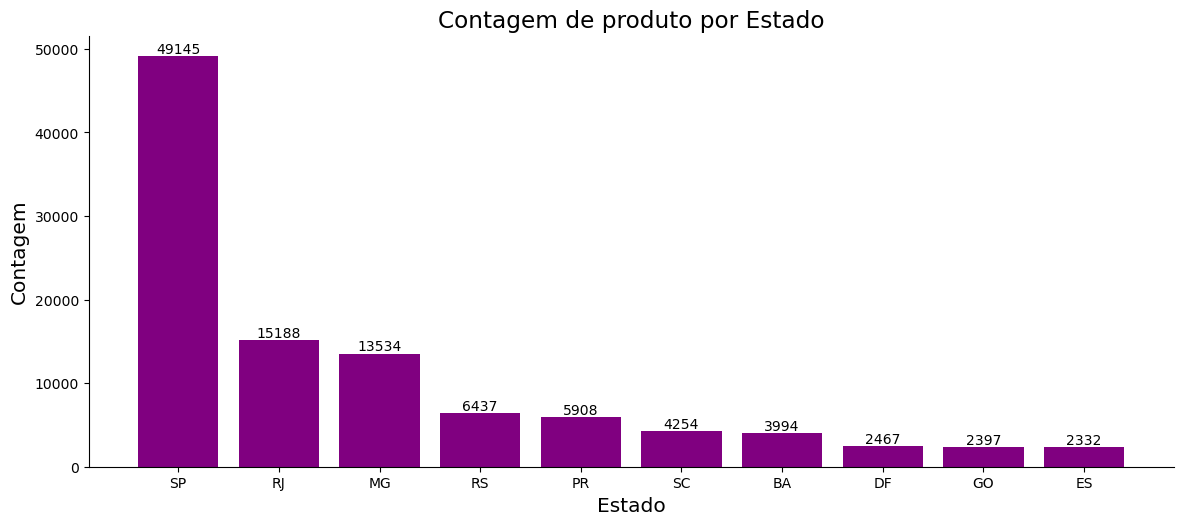

In [58]:

colors = ["purple"]
fig, px= plt.subplots(figsize=(14,5.6))
_=plt.title("Contagem de produto por Estado", fontsize=16.7)
_=plt.ylabel("Contagem",fontsize=14.5)
_=plt.xlabel("Estado",fontsize=14.5)
px.bar(estados.index,estados.values,color=colors)
_=plt.gca().spines["top"].set_visible(False)
_=plt.gca().spines["right"].set_visible(False)
#gca mean:  "get current axes"
for i,v in enumerate(estados.values):
    px.text(i,v,str(v), ha="center",va="bottom")


plt.show()

In [11]:
estados_semSP = merged.groupby("customer_state")["product_category_name"].count().sort_values(ascending=False)[1:10]

In [12]:
estados_semSP

customer_state
RJ    15188
MG    13534
RS     6437
PR     5908
SC     4254
BA     3994
DF     2467
GO     2397
ES     2332
Name: product_category_name, dtype: int64

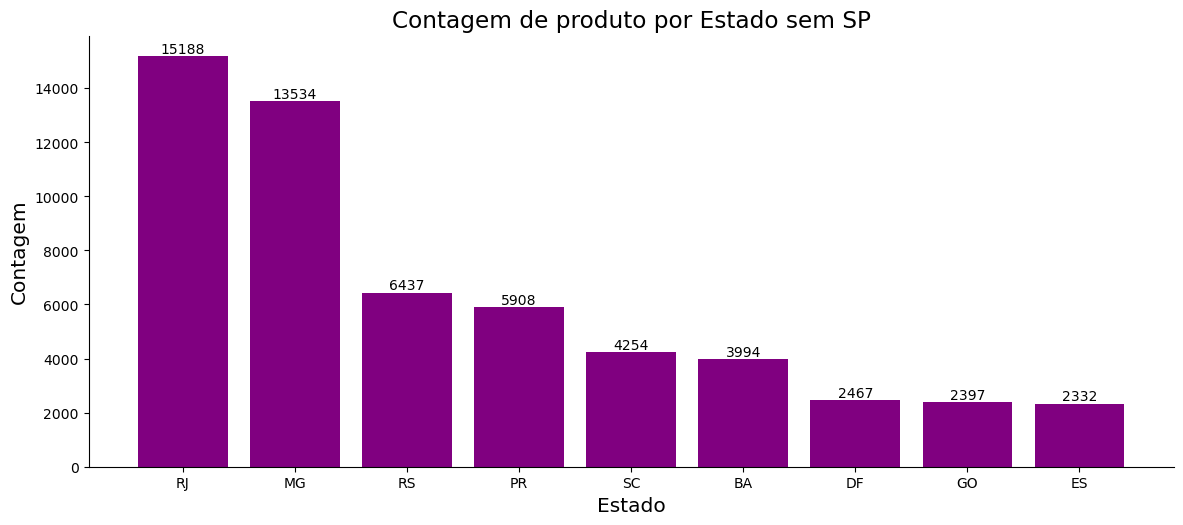

In [57]:
colors = ["purple"]
fig, px = plt.subplots(figsize=(14,5.6))
_=plt.title("Contagem de produto por Estado sem SP", fontsize=16.7)
_=plt.ylabel("Contagem",fontsize=14.5)
_=plt.xlabel("Estado",fontsize=14.5)
px.bar(estados_semSP.index,estados_semSP.values,color=colors)
_=plt.gca().spines["top"].set_visible(False)
_=plt.gca().spines["right"].set_visible(False)
#gca mean:  "get current axes"
for i,v in enumerate(estados_semSP.values):
    px.text(i,v,str(v), ha="center",va="bottom")

plt.show()

In [14]:
maiores = estados.iloc[:2]
maiores = pd.DataFrame(np.floor(maiores*100/estados.values.sum()))


In [15]:
maiores = estados.iloc[:2]
maiores = np.floor(maiores*100/estados.values.sum())

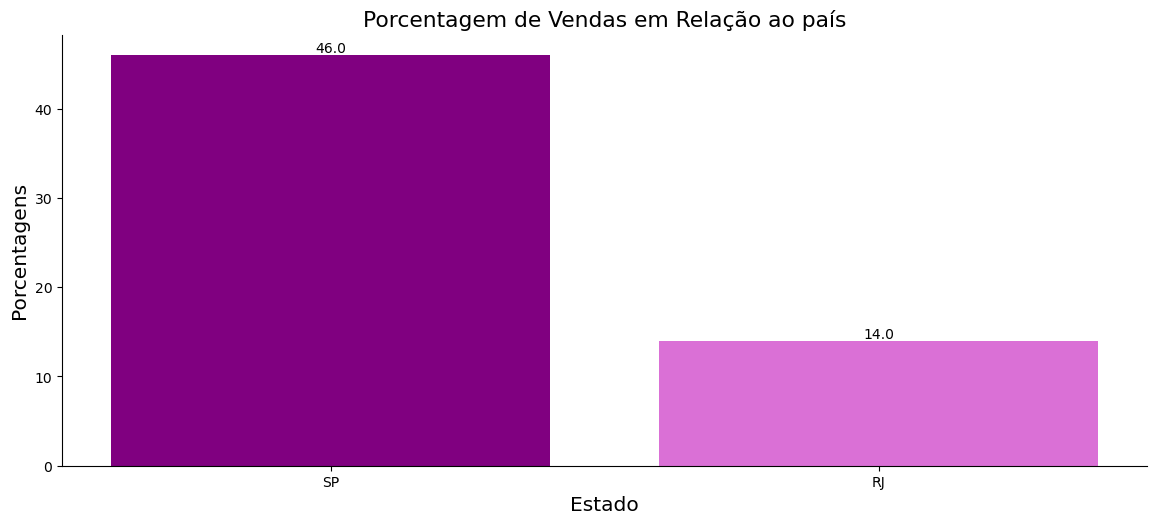

In [38]:
colors = ["purple","orchid"]
fig, px = plt.subplots(figsize=(14,5.6))
_=plt.title("Porcentagem de Vendas em Relação ao país", fontsize=15.7)
_=plt.ylabel("Porcentagens",fontsize=14.5)
_=plt.xlabel("Estado",fontsize=14.5)
px.bar(maiores.index,maiores.values,color=colors)
_=plt.gca().spines["top"].set_visible(False)
_=plt.gca().spines["right"].set_visible(False)
#gca mean:  "get current axes"
for i,v in enumerate(maiores.values):
    px.text(i,v,str(v), ha="center",va="bottom")


plt.show()

In [17]:
merged.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,4a90af3e85dd563884e2afeab1091394,1.0,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,...,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,f421a2a66b69dbfe6db0c87845281a90,4661,sao paulo,SP
1,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1.0,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,...,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,b4527423469300ee354458e1b5f961be,32223,contagem,MG
2,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2.0,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,...,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,af0f26435fade1ca984d9affda307199,9310,maua,SP
3,8c16d1f32a54d92897cc437244442e1b,89023.0,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1.0,1b37d55343061aa2b18b807945ff9831,2017-09-05 12:50:19,118.90,26.68,...,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,af0f26435fade1ca984d9affda307199,9310,maua,SP
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844.0,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1.0,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,...,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04 00:00:00,be1401bbfd64455c798bb4683e915c61,22050,rio de janeiro,RJ


In [18]:
merged_precos_maiores = merged.groupby("customer_state")["price"].mean()
merged_precos_maiores = merged_precos_maiores.sort_values(ascending=False)[:10]
merged_precos2 = pd.Series(np.floor(merged_precos_maiores.values))

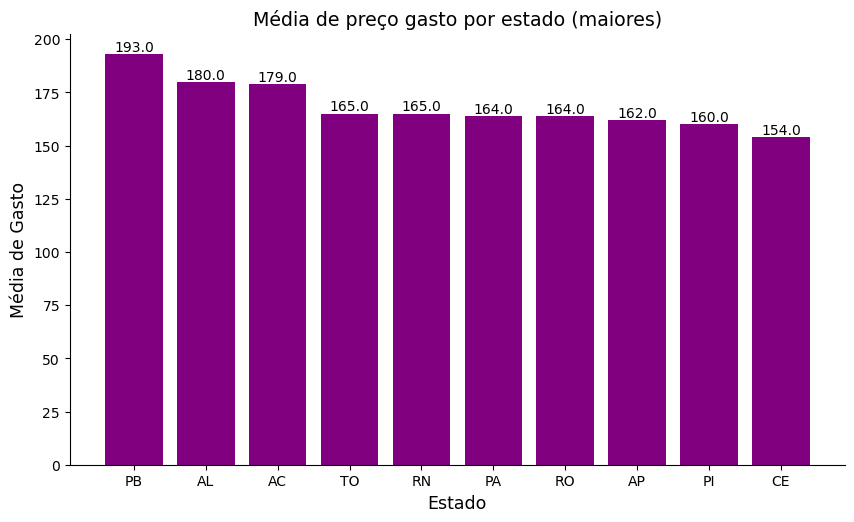

In [46]:
colors = ["purple"]
fig, px = plt.subplots(figsize=(10,5.6))
_=plt.title("Média de preço gasto por estado (maiores)", fontsize=13.7)
_=plt.ylabel("Média de Gasto",fontsize=12.5)
_=plt.xlabel("Estado",fontsize=12.5)
px.bar(merged_precos_maiores.index,merged_precos2.values,color=colors)
_=plt.gca().spines["top"].set_visible(False)
_=plt.gca().spines["right"].set_visible(False)
#gca mean:  "get current axes"
for i,v in enumerate(merged_precos2.values):
    px.text(i,v,str(v), ha="center",va="bottom")


plt.show()

In [20]:
merged_precos_menores = merged.groupby("customer_state")["price"].mean()
merged_precos_menores = merged_precos_menores.sort_values(ascending=True)[:10]
merged_precos_min = pd.Series(np.floor(merged_precos_menores.values))

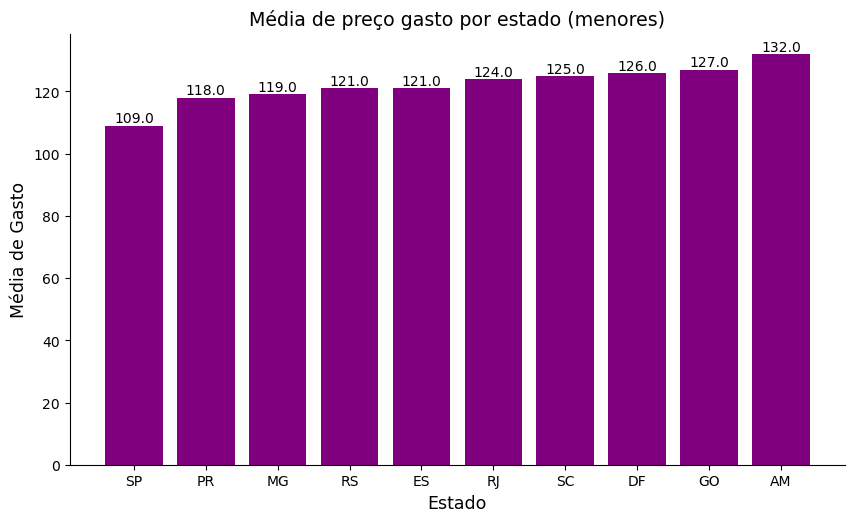

In [45]:

colors = ["purple"]
fig, px = plt.subplots(figsize=(10,5.6))
_=plt.title("Média de preço gasto por estado (menores)", fontsize=13.7)
_=plt.ylabel("Média de Gasto",fontsize=12.5)
_=plt.xlabel("Estado",fontsize=12.5)
px.bar(merged_precos_menores.index,merged_precos_min.values,color=colors)
_=plt.gca().spines["top"].set_visible(False)
_=plt.gca().spines["right"].set_visible(False)
#gca mean:  "get current axes"
for i,v in enumerate(merged_precos_min.values):
    px.text(i,v,str(v), ha="center",va="bottom")


plt.show()

In [22]:
merged_precos_menores = pd.DataFrame(merged_precos_menores)
merged_precos_menores["Média de Preço"] = "Baixa"

merged_precos_maiores = pd.DataFrame(merged_precos_maiores)
merged_precos_maiores["Média de Preço"] = "Alta"


In [47]:
fig = go.Figure()


fig.add_trace(go.Box(x=merged_precos_maiores["Média de Preço"],
                    y=merged_precos_maiores["price"],
                    name="Altos Preços",
                    boxpoints="outliers",
                    marker_color="purple"
))


fig.add_trace(go.Box(x=merged_precos_menores["Média de Preço"],
                    y=merged_precos_menores["price"],
                    name="Baixos Preços",
                    boxpoints="outliers",
                    marker_color="magenta"
))

fig.update_layout(
    xaxis=dict(title="Situação Sobre Média de Preço"),
    yaxis=dict(title="Preço"),
    title="Rent by Class",
    showlegend=True)




fig.show()

In [24]:
merged.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,4a90af3e85dd563884e2afeab1091394,1.0,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,...,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,f421a2a66b69dbfe6db0c87845281a90,4661,sao paulo,SP
1,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1.0,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,...,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,b4527423469300ee354458e1b5f961be,32223,contagem,MG
2,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2.0,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,...,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,af0f26435fade1ca984d9affda307199,9310,maua,SP
3,8c16d1f32a54d92897cc437244442e1b,89023.0,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1.0,1b37d55343061aa2b18b807945ff9831,2017-09-05 12:50:19,118.90,26.68,...,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,af0f26435fade1ca984d9affda307199,9310,maua,SP
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844.0,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1.0,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,...,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04 00:00:00,be1401bbfd64455c798bb4683e915c61,22050,rio de janeiro,RJ


In [48]:
merged = merged.dropna(axis=0, subset=['order_estimated_delivery_date'])


In [49]:
tabela2016_ = merged[merged["order_purchase_timestamp"].str.contains("2016-")]
tabela2017 = merged[merged["order_purchase_timestamp"].str.contains("2017-")]
tabela2018 = merged[merged["order_purchase_timestamp"].str.contains("2018-")]


In [50]:
tabela2016_atrasados = tabela2016_[tabela2016_["order_estimated_delivery_date"]<tabela2016_["order_delivered_customer_date"]]
tabela2016_nahora = tabela2016_[tabela2016_["order_estimated_delivery_date"]>=tabela2016_["order_delivered_customer_date"]]

tabela2016_atrasados ["Situação_do_Pedido"] = "Atraso"
tabela2016_nahora ["Situação_do_Pedido"] = "Sem Atraso"


tabela2017_atrasados = tabela2017[tabela2017["order_estimated_delivery_date"]<tabela2017["order_delivered_customer_date"]]
tabela2017_nahora =  tabela2017[tabela2017["order_estimated_delivery_date"]>=tabela2017["order_delivered_customer_date"]]

tabela2017_atrasados ["Situação_do_Pedido"] = "Atraso"
tabela2017_nahora ["Situação_do_Pedido"] = "Sem Atraso"

tabela2018_atrasados = tabela2018[tabela2018["order_estimated_delivery_date"]<tabela2018["order_delivered_customer_date"]]
tabela2018_nahora =  tabela2018[tabela2018["order_estimated_delivery_date"]>=tabela2018["order_delivered_customer_date"]]

tabela2018_atrasados ["Situação_do_Pedido"] = "Atraso"
tabela2018_nahora ["Situação_do_Pedido"] = "Sem Atraso"

C:\Users\ferna\AppData\Local\Temp\ipykernel_9412\1657190718.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ferna\AppData\Local\Temp\ipykernel_9412\1657190718.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ferna\AppData\Local\Temp\ipykernel_9412\1657190718.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [51]:


merged_series2016 = pd.concat([tabela2016_atrasados, tabela2016_nahora])
merged_series2017 = pd.concat([tabela2017_atrasados, tabela2017_nahora])
merged_series2018 = pd.concat([tabela2018_atrasados, tabela2018_nahora])


In [52]:
df2016_final = merged_series2016.Situação_do_Pedido.value_counts()
df2017_final = merged_series2017.Situação_do_Pedido.value_counts()
df2018_final = merged_series2018.Situação_do_Pedido.value_counts()


In [53]:
df2016_final

Situação_do_Pedido
Sem Atraso    338
Atraso          6
Name: count, dtype: int64

In [55]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df2016_final.index,
    y=df2016_final.values,
    name="Ano de 2016",
    marker_color="magenta"
))


fig.add_trace(go.Bar(
    x=df2017_final.index,
    y=df2017_final.values,
    name="Ano de 2017",
    marker_color="purple"
))

fig.add_trace(go.Bar(
    x=df2018_final.index,
    y=df2018_final.values,
    name="Ano de 2018",
    marker_color="orchid"
))

fig.update_layout(title="Relação entre atraso e ano",
    xaxis_title="Situação do Pedido",
    yaxis_title = "Número de Pedidos"
)





fig.show()